In [1]:
using MultiPoly
using PyPlot

In [2]:
using ProfileView

In [5]:
import SoftRobots
reload("SoftRobots")
reload("SpatialFields")

INFO: Recompiling stale cache file /Users/rdeits/.julia/lib/v0.4/SoftRobots.ji for module SoftRobots.
INFO: Precompiling module SoftRobots...
INFO: Recompiling stale cache file /Users/rdeits/.julia/lib/v0.4/SoftRobots.ji for module SoftRobots.


LoadError: LoadError: __precompile__(true) but require failed to create a precompiled cache file
while loading In[5], in expression starting on line 2

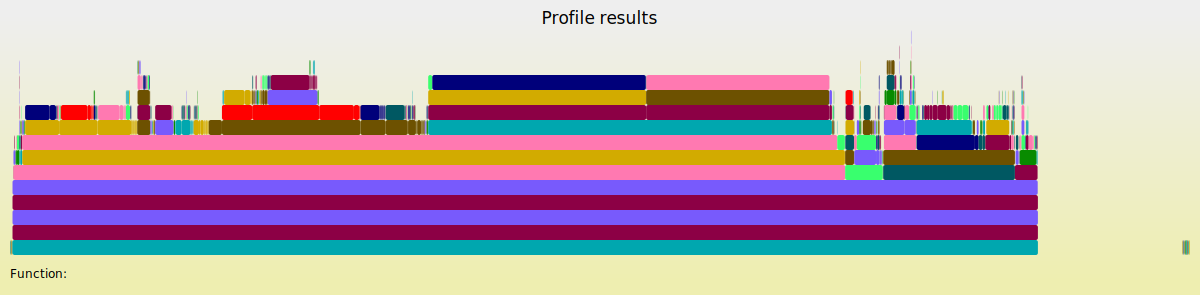

8.210607 seconds (6.81 M allocations: 376.105 MB, 4.55% gc time)


In [6]:
world = SoftRobots.World2D()
world_state = Dict{SoftRobots.Object, SoftRobots.ObjectState}()

r, snake_state = SoftRobots.snake()
push!(world.objects, r)
world_state[r] = snake_state

x, y = generators(MPoly{Float64}, :x, :y)
terrain = SoftRobots.FixedObject()
terrain_state = SoftRobots.FixedObjectState(-(0.1 + 0.5x^2 - 1y))
push!(world.objects, terrain)
world_state[terrain] = terrain_state

SoftRobots.update!(world, world_state, 0.001)

Profile.clear()
@time @profile for j = 1:1000
    SoftRobots.update!(world, world_state, 0.001)
end
ProfileView.view()